<a href="https://colab.research.google.com/github/gabrielavillagran/Python/blob/main/Pandas_formatos_diferentes_de_entrada_e_saida_(IO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [1]:
import pandas as pd

In [2]:
# Importando os dados com os nomes femininos e masculinos

nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')


In [3]:
soma_nomes  = nomes_f.shape[0] + nomes_m.shape[0]

print('Quantidade de nomes é : {}'.format(soma_nomes))

Quantidade de nomes é : 400


In [4]:
# sample = sorteia, 5 nomes femininos

nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
75,MARLI,0,209633,76,F
172,REBECA,0,92065,173,F
20,GABRIELA,0,378807,21,F
198,ISADORA,0,81100,199,F
195,ROSANE,0,82203,196,F


In [5]:
# sample = sorteia, 5 nomes masculinos

nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
128,EDVALDO,0,114305,129,M
66,DANILO,0,231855,67,M
24,FABIO,0,545581,25,M
158,EDIVALDO,0,81446,159,M
153,CAUA,0,84584,154,M


In [6]:
frames = [nomes_f, nomes_m] # juntados os dois conjuntos de dados

In [7]:
# o pd.concat concatena os dados, os nomes femininos e nomes masculinos 
# o ['nome'] estou dizendo qual coluna quero concatenar
# to_frame(), tranforma em um DataFrame

nomes = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [8]:
# Agora vamos sortear 5 nomes do conjunto (nomes masculinos e femininos juntos)
nomes.sample(5)

,nome
68,LUIZA
36,ROBERTO
164,MARISA
172,WANDERSON
93,ELIANA


In [9]:
nomes.shape[0] # Possui os 400 dados 

400

# Incluindo ID dos alunos

In [10]:
import numpy as np
np.random.seed(123)

In [11]:
total_alunos = len(nomes)


In [12]:
# Distruimos a matricula de maneira aleatória, independente do seu index comecando de 1 até total_alunos
nomes['ID_aluno'] = np.random.permutation(total_alunos) + 1


In [13]:
nomes.sample(10)

,nome,ID_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111
84,SEVERINO,78
104,EVA,13
36,ROBERTO,364
4,ADRIANA,343
67,HENRIQUE,64


In [14]:
# Criando o dominio de e-mail

dominios = [ '@dominioemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes

,nome,ID_aluno,dominio
0,MARIA,235,@dominioemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominioemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominioemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominioemail.com.br
198,ALVARO,383,@dominioemail.com.br


In [15]:
nomes.sample(5)

,nome,ID_aluno,dominio
84,SEVERINO,78,@dominioemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [16]:
nomes['email'] = (nomes['nome'] + nomes['dominio']).str.lower()

In [17]:
nomes.sample(5)

,nome,ID_aluno,dominio,email
114,ARTHUR,320,@dominioemail.com.br,arthur@dominioemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominioemail.com.br,helena@dominioemail.com.br
183,IRACI,8,@dominioemail.com.br,iraci@dominioemail.com.br
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br


# Criando a tabela Cursos

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [19]:
import html5lib

In [20]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [21]:
cursos[0]  # [0] para transformar em um DataFrame

cursos = cursos[0]

In [22]:
type(cursos) # agora temos um DataFrame e não uma List

pandas.core.frame.DataFrame

In [23]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index de cursos

In [24]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos.head(2)

# ou cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [25]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [26]:
cursos['Id'] = cursos.index + 1
# Adicionando um Id para cada aluno

In [27]:
cursos.head()

,nome_do_curso,Id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [28]:
# Criamos um ID para cada curso e setamos o index para ser o id com o código 
cursos = cursos.set_index('Id')

In [29]:
cursos.head()

,nome_do_curso
Id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [30]:
nomes.sample(5)

,nome,ID_aluno,dominio,email
59,ISABEL,83,@dominioemail.com.br,isabel@dominioemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominioemail.com.br,junior@dominioemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominioemail.com.br,valdemir@dominioemail.com.br


In [31]:
# Poucos alunos se matriculam em vários cursos, e muitos em poucos cursos.
# Desta maneira vamos criar esse tipo de 'curva'

nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)*1.5).astype(int)

In [32]:
nomes.sample(5)

,nome,ID_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominioemail.com.br,rafaela@dominioemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominioemail.com.br,pamela@dominioemail.com.br,1


In [33]:
nomes['matriculas'].describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [34]:
import seaborn as sns

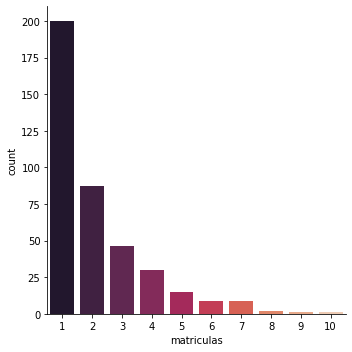

In [35]:
# Grafico de barras 
numero_de_matriculas_por_curso_barras = sns.catplot(x='matriculas',
                                                    kind='count', 
                                                    data= nomes,
                                                    palette = 'rocket')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


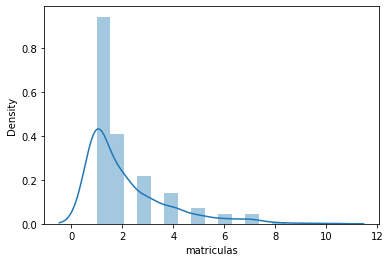

In [36]:
# Histograma
numero_de_matriculas_por_curso_histograma = sns.distplot(nomes['matriculas'])

In [37]:
df_numero_de_matriculas_por_curso = nomes['matriculas'].value_counts().to_frame()
df_numero_de_matriculas_por_curso.columns = ['numero de matriculas']

In [38]:
df_numero_de_matriculas_por_curso

,numero de matriculas
1,200
2,87
3,46
4,30
5,15
7,9
6,9
8,2
9,1
10,1


# Selecionando cursos

In [39]:
nomes.sample(5)

,nome,ID_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominioemail.com.br,neusa@dominioemail.com.br,2


In [40]:
# Temos a quantidade de cursos que cada aluno faz, porem nao mostramos quais são esses cursos.
# Nosso objetivo será justamente criar um dataframe que informe
# Por exemplo, que "Nilza" está inscrita nos cursos de Java e Python, que "Danilo" está inscrito nos cursos de C#, e assim por diante.

todas_matriculas = []
curso_aleatorio = np.random.rand(20)
prob = curso_aleatorio / sum(curso_aleatorio)

In [41]:
# Agora vamos atribuir os cursos de forma aleatória para cada aluno
# terrows  == ele devolve linha a linha
# row == linhas
for index, row in nomes.iterrows():
  id = row.ID_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])


In [42]:
matriculas.head(5)

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [43]:
# Com a DataFrame acima vamos 

In [44]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [46]:
nomes.sample(3)

,nome,ID_aluno,dominio,email,matriculas
195,WALTER,231,@dominioemail.com.br,walter@dominioemail.com.br,2
90,ANDRESSA,213,@servicodoemail.com,andressa@servicodoemail.com,1
191,ERICK,124,@dominioemail.com.br,erick@dominioemail.com.br,1


In [49]:
cursos.head()

,nome_do_curso
Id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [50]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [51]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [53]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Saída em diferentes formatos

In [54]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index= False)

In [57]:
pd.read_csv('matriculas_por_curso.csv', sep=',')

,quantidade_de_alunos,nome_do_curso
0,59,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,75,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,40,Código limpo com C#


In [60]:
matriculas_json = matriculas_por_curso.to_json()

In [61]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [62]:
matriculas_html =  matriculas_por_curso.to_html()

In [65]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando o banco sql

In [66]:
!pip install sqlalchemy

In [67]:
from sqlalchemy import create_engine, MetaData, Table

In [68]:
engine = create_engine('sqlite:///:memory:') # quero o banco de dados salvando na memória local


In [69]:
engine

Engine(sqlite:///:memory:)

In [70]:
type(engine)

sqlalchemy.engine.base.Engine

In [73]:
# Transformando matriculas_por_curso em sql

matriculas_por_curso.to_sql('matriculas', engine)

In [75]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco sql

In [77]:
# Criaremos uma variável query na qual definiremos a nossa busca
# começando com select * from. A ideia é trazermos todos os cursos 
# com menos de 20 pessoas matriculadas, portanto,
# select * from matriculas where quantidade_de_alunos < 20.

query = 'select * from matriculas where quantidade_de_alunos < 20'

In [79]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [82]:
# Alterando a ordem daas colunas
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso','quantidade_de_alunos'])

In [86]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [87]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,75
18,Boas práticas em Java,75


# Escrevendo no banco

In [88]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [89]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#  Nomes dos alunos e alunas da próxima turma

In [92]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [93]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [105]:
# Vamos filtrar todos os alunos que possuem o id_curso = 14, que é o curso 'Desenvolvendo jogos'

id_curso = 14
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso)).drop_duplicates()
proxima_turma

,id_aluno,id_curso
106,27,14
113,233,14
116,25,14
124,14,14
134,21,14
147,212,14
199,273,14
259,380,14
276,280,14
293,370,14


In [97]:
nomes.sample(3)

,nome,ID_aluno,dominio,email,matriculas
137,NAIR,129,@servicodoemail.com,nair@servicodoemail.com,2
199,GEOVANE,366,@servicodoemail.com,geovane@servicodoemail.com,4
54,REGINA,281,@dominioemail.com.br,regina@dominioemail.com.br,1


In [106]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('ID_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
27,14,RAFAELA,@dominioemail.com.br,rafaela@dominioemail.com.br,1
233,14,ELAINE,@servicodoemail.com,elaine@servicodoemail.com,3
25,14,DANIELE,@dominioemail.com.br,daniele@dominioemail.com.br,4
14,14,SUELI,@dominioemail.com.br,sueli@dominioemail.com.br,6
21,14,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,4
212,14,PAULA,@dominioemail.com.br,paula@dominioemail.com.br,1
273,14,ALICE,@servicodoemail.com,alice@servicodoemail.com,5
380,14,ELZA,@dominioemail.com.br,elza@dominioemail.com.br,1
280,14,LAIS,@dominioemail.com.br,lais@dominioemail.com.br,4


In [111]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('ID_aluno'))['nome'].drop_duplicates().to_frame()

,nome
id_aluno,
27,RAFAELA
233,ELAINE
25,DANIELE
14,SUELI
21,BIANCA
212,PAULA
273,ALICE
380,ELZA
280,LAIS


In [113]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Desenvolvendo jogos
Name: 14, dtype: object

In [114]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Desenvolvendo jogos'

In [115]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('ID_aluno'))['nome'].drop_duplicates().to_frame()

In [116]:
proxima_turma

,nome
id_aluno,
27,RAFAELA
233,ELAINE
25,DANIELE
14,SUELI
21,BIANCA
212,PAULA
273,ALICE
380,ELZA
280,LAIS


In [119]:
proxima_turma = proxima_turma.rename(columns= {'nome' : 'Alunos do curso {}'.format(nome_curso)})

In [120]:
proxima_turma.sample(5)

,Alunos do curso Desenvolvendo jogos
id_aluno,
212,PAULA
273,ALICE
351,EMANUEL
27,RAFAELA
85,ANGELO


In [121]:
proxima_turma_excel = proxima_turma.to_excel('proxima_turma.xlsx')

In [122]:
pd.read_excel('proxima_turma.xlsx')

,id_aluno,Alunos do curso Desenvolvendo jogos
0,27,RAFAELA
1,233,ELAINE
2,25,DANIELE
3,14,SUELI
4,21,BIANCA
5,212,PAULA
6,273,ALICE
7,380,ELZA
8,280,LAIS
9,370,ANGELICA
